## Explaratory Data Analysis

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from ast import literal_eval
import warnings
warnings.filterwarnings("ignore")
sns.set_palette("magma")
pd.set_option("display.max_columns", 50)

#### Data Wrangling

In [3]:
df = pd.read_csv("tmdb_5000_movies.csv")
df2 = pd.read_csv("tmdb_5000_credits.csv")

In [4]:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [5]:
df.shape

(4803, 20)

In [6]:
df2.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
df2.shape

(4803, 4)

In [8]:
movie = pd.merge(df, df2, how="inner", left_on="id", right_on="movie_id")

In [9]:
movie.set_index("original_title", inplace=True)

In [10]:
movie.head(3)

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
original_title,,,,,,,,,,,,,,,,,,,,,,,
Avatar,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
Pirates of the Caribbean: At World's End,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
Spectre,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [11]:
# Some features are consist of list and dictionary type objects. However, read_csv turns them into string format.
# literal_eval function allows us to convert them into original format.

features = ["genres", "keywords", "production_companies", "production_countries", "spoken_languages", "cast", "crew"]
for feat in features:
    movie[feat] = movie[feat].apply(literal_eval)

In [12]:
# Get values from dictionaries

for i in ["genres", "keywords", "production_companies", "production_countries", "spoken_languages"]:
    movie[i] = movie[i].apply(lambda x: [y["name"] for y in x])

In [13]:
# First five cast members of all films

movie["cast"] = movie["cast"].apply(lambda x: [y["name"] for y in x][:5])

In [14]:
movie["status"].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [15]:
# Movies with Rumored and Post Production status are removed.

movie = movie[movie["status"] == "Released"]

In [16]:
# Some features will not be important for future process. They are removed.

movie.drop(["title_x", "title_y", "id", "movie_id", "homepage", "status", "tagline", "crew"], axis=1, inplace=True)

In [17]:
movie.shape

(4795, 15)

#### Data Visualization

In [18]:
# Code for getting genre count

genre  = dict()
for i in movie["genres"]:
    for j in i:
        if j not in genre:
            genre[j] = 1
        else:
            genre[j] += 1
genre = dict(sorted(genre.items(), key=lambda x: x[1], reverse=True))

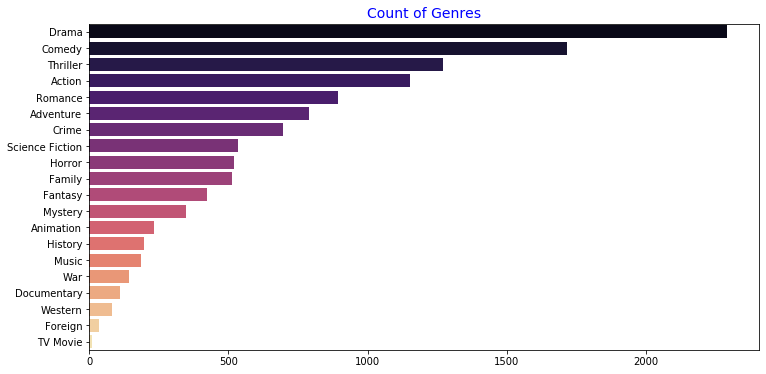

In [19]:
plt.figure(figsize=(12,6))
plt.title("Count of Genres", c="blue", size=14)
sns.barplot(y = list(genre.keys()), x = list(genre.values()), orient="h", palette="magma")

In [20]:
# Code for getting production company count

company  = dict()
for i in movie["production_companies"]:
    for j in i:
        if j not in company:
            company[j] = 1
        else:
            company[j] += 1
company = dict(sorted(company.items(), key=lambda x: x[1], reverse=True))

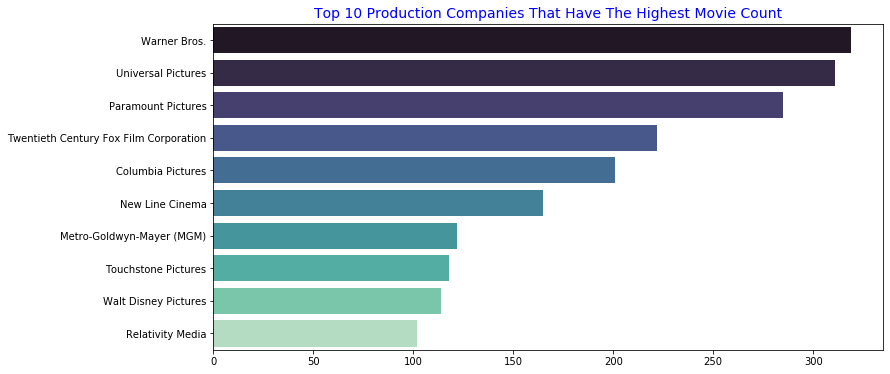

In [29]:
plt.figure(figsize=(12,6))
plt.title("Top 10 Production Companies That Have The Highest Movie Count", c="blue", size=14)
sns.barplot(y = list(company.keys())[:10], x = list(company.values())[:10], orient="h", palette="mako")

In [26]:
# Code for getting country count

country  = dict()
for i in movie["production_countries"]:
    for j in i:
        if j not in country:
            country[j] = 1
        else:
            country[j] += 1
country = dict(sorted(country.items(), key=lambda x: x[1], reverse=True))

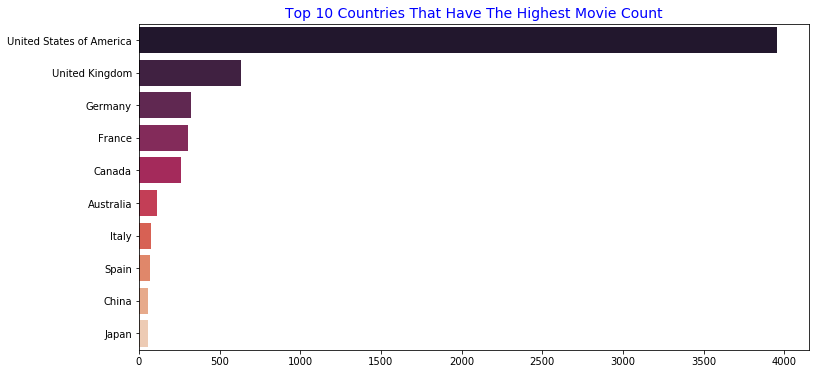

In [34]:
plt.figure(figsize=(12,6))
plt.title("Top 10 Countries That Have The Highest Movie Count", c="blue", size=14)
sns.barplot(y = list(country.keys())[:10], x = list(country.values())[:10], orient="h", palette="rocket")

In [31]:
# Code for getting cast count

cast  = dict()
for i in movie["cast"]:
    for j in i:
        if j not in cast:
            cast[j] = 1
        else:
            cast[j] += 1
cast = dict(sorted(cast.items(), key=lambda x: x[1], reverse=True))

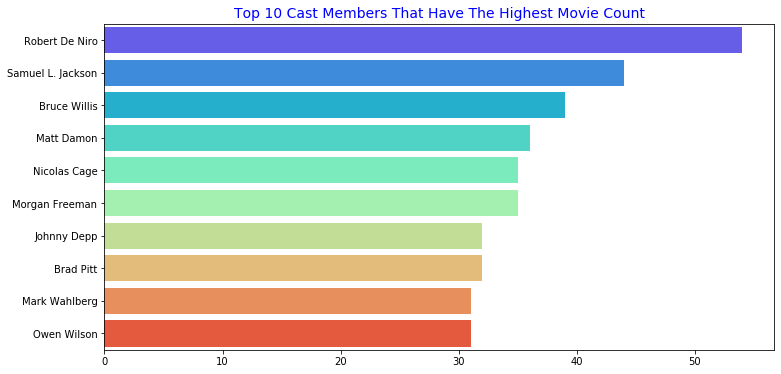

In [38]:
plt.figure(figsize=(12,6))
plt.title("Top 10 Cast Members That Have The Highest Movie Count", c="blue", size=14)
sns.barplot(y = list(cast.keys())[:10], x = list(cast.values())[:10], orient="h", palette="rainbow")

#### Filling Missing Values

In [39]:
movie.isnull().sum()

budget                  0
genres                  0
keywords                0
original_language       0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
vote_average            0
vote_count              0
cast                    0
dtype: int64

In [41]:
movie["overview"].fillna("", inplace=True)

In [42]:
# Empty lists will be converted to Unknown.

for i in ["genres", "keywords", "production_companies", "production_countries", "spoken_languages", "cast"]:
    movie[i] = movie[i].apply(lambda x: x + ["Unknown"]  if len(x) == 0 else x)

## Content Based Recommendation

#### Recommendation by Genre

In [43]:
movie["genres"].head()

original_title
Avatar                                      [Action, Adventure, Fantasy, Science Fiction]
Pirates of the Caribbean: At World's End                     [Adventure, Fantasy, Action]
Spectre                                                        [Action, Adventure, Crime]
The Dark Knight Rises                                    [Action, Crime, Drama, Thriller]
John Carter                                          [Action, Adventure, Science Fiction]
Name: genres, dtype: object

In [44]:
# "TV Movie" will falsify Tf-Idf score. So that, TV Movie is changed with TV_Movie

movie["genres"] = movie["genres"].apply(lambda x:["TV_Movie" if i == "TV Movie" else i for i in x])
movie["genres"] = movie["genres"].apply(lambda x: " ".join(x))

In [45]:
tfidf = TfidfVectorizer(stop_words="english")
overview_matrix_genre = tfidf.fit_transform(movie["genres"])
overview_matrix_genre.shape

(4795, 22)

In [46]:
similarity_matrix_genre = linear_kernel(overview_matrix_genre,overview_matrix_genre)
similarity_matrix_genre

array([[1.        , 0.74508627, 0.42935843, ..., 0.        , 0.        ,
        0.        ],
       [0.74508627, 1.        , 0.57625331, ..., 0.        , 0.        ,
        0.        ],
       [0.42935843, 0.57625331, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [47]:
# movie_index will be useful for identifying the index of input movie

movie_index = pd.Series(data=list(range(movie.shape[0])), index = movie.index)
movie_index.head()

original_title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

In [48]:
def recommend_movie_by_genre(x):
    
    """ This function apply these phases: 
        
        1. Find the index of input movie
        2. Create dataframe by the data of similarity_matrix_genre with using index of movie
        3. Sort dataframe by the similarity values
        4. Recommend 10 movie """
    
    new_index = movie_index[x]
    df = pd.DataFrame(similarity_matrix_genre[new_index], index=movie.index)
    df.sort_values(by=0, ascending=False, inplace=True)
    
    print("Recommended Movies for", x, "by Genre Type")
    print("\n")
    print("*****")
    
    if x in df.index[:10]:
        for i in df.index[:11]:
            if i != x:
                print(i)
    else:
        for i in df.index[:10]:
            print(i)
    print("*****")

In [49]:
recommend_movie_by_genre("Star Wars")

Recommended Movies for Star Wars by Genre Type


*****
Six-String Samurai
Fantastic Four
Total Recall
Return of the Jedi
Iron Man
Star Wars: Episode III - Revenge of the Sith
Star Wars: Episode II - Attack of the Clones
Star Wars: Episode I - The Phantom Menace
2012
After Earth
*****


In [50]:
recommend_movie_by_genre("Fury")

Recommended Movies for Fury by Genre Type


*****
Platoon
Tears of the Sun
American Sniper
300: Rise of an Empire
U-571
Behind Enemy Lines
Lone Survivor
The Train
Inglourious Basterds
The Boy in the Striped Pyjamas
*****


#### Recommend by Overview

In [53]:
movie["overview"].head()

original_title
Avatar                                      In the 22nd century, a paraplegic Marine is di...
Pirates of the Caribbean: At World's End    Captain Barbossa, long believed to be dead, ha...
Spectre                                     A cryptic message from Bond’s past sends him o...
The Dark Knight Rises                       Following the death of District Attorney Harve...
John Carter                                 John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [54]:
tfidf = TfidfVectorizer(stop_words="english")
overview_matrix_overview = tfidf.fit_transform(movie["overview"])
overview_matrix_overview.shape

(4795, 20970)

In [55]:
similarity_matrix_overview = linear_kernel(overview_matrix_overview,overview_matrix_overview)
similarity_matrix_overview

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160086, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01487813, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160086, 0.01487813, ..., 1.        , 0.01608529,
        0.00701461],
       [0.        , 0.        , 0.        , ..., 0.01608529, 1.        ,
        0.01170856],
       [0.        , 0.        , 0.        , ..., 0.00701461, 0.01170856,
        1.        ]])

In [56]:
def recommend_movie_by_overview(x):
    
    
    """ This function apply these phases: 
        
        1. Find the index of input movie
        2. Create dataframe by the data of similarity_matrix_overview with using index of movie
        3. Sort dataframe by the similarity values
        4. Recommend 10 movie """
    
    new_index = movie_index[x]
    df = pd.DataFrame(similarity_matrix_overview[new_index], index=movie.index)
    df.sort_values(by=0, ascending=False, inplace=True)
    
    print("Recommended Movies for", x, "by Overview")
    print("\n")
    print("*****")
    
    if x in df.index[:10]:
        for i in df.index[:11]:
            if i != x:
                print(i)
    else:
        for i in df.index[:10]:
            print(i)
    print("*****")

In [57]:
recommend_movie_by_overview("Star Wars")

Recommended Movies for Star Wars by Overview


*****
The Empire Strikes Back
Return of the Jedi
Shanghai Noon
Baahubali: The Beginning
Arbitrage
The Princess Bride
Mirror Mirror
History of the World: Part I
The Princess Diaries 2: Royal Engagement
Topsy-Turvy
*****


In [58]:
recommend_movie_by_overview("Fury")

Recommended Movies for Fury by Overview


*****
The Great Raid
One Man's Hero
Der Untergang
U-571
Enemy at the Gates
The Monuments Men
The Nutty Professor
Proud
The Big Parade
The Thin Red Line
*****


### Recommended by keyword

In [59]:
movie["keywords"] = movie["keywords"].apply(lambda x: " ".join(x))

In [60]:
tfidf = TfidfVectorizer(stop_words="english")
overview_matrix_keywords = tfidf.fit_transform(movie["keywords"])
overview_matrix_keywords.shape

(4795, 7063)

In [61]:
similarity_matrix_keywords = linear_kernel(overview_matrix_keywords,overview_matrix_keywords)
similarity_matrix_keywords

array([[1.        , 0.01284785, 0.        , ..., 0.02125237, 0.        ,
        0.        ],
       [0.01284785, 1.        , 0.        , ..., 0.02620914, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02125237, 0.02620914, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [62]:
def recommend_movie_by_keywords(x):
    
    
    """ This function apply these phases: 
        
        1. Find the index of input movie
        2. Create dataframe by the data of similarity_matrix_keywords with using index of movie
        3. Sort dataframe by the similarity values
        4. Recommend 10 movie """
    
    new_index = movie_index[x]
    df = pd.DataFrame(similarity_matrix_keywords[new_index], index=movie.index)
    df.sort_values(by=0, ascending=False, inplace= True)
    
    print("Recommended Movies for", x, "by Keywords")
    print("\n")
    print("*****")
    
    if x in df.index[:10]:
        for i in df.index[:11]:
            if i != x:
                print(i)
    else:
        for i in df.index[:10]:
            print(i)
    print("*****")

In [63]:
recommend_movie_by_keywords("Star Wars")

Recommended Movies for Star Wars by Keywords


*****
The Empire Strikes Back
Titan A.E.
Return of the Jedi
Star Wars: Episode III - Revenge of the Sith
Star Wars: Episode II - Attack of the Clones
Star Wars: Episode I - The Phantom Menace
Spaceballs
Killer Elite
Star Wars: Clone Wars (Volume 1)
Gravity
*****


In [64]:
recommend_movie_by_keywords("Fury")

Recommended Movies for Fury by Keywords


*****
The Book Thief
The Monuments Men
Saints and Soldiers
A Bridge Too Far
All The Queen's Men
Oorlogswinter
Captain America: The First Avenger
Torn Curtain
Little Boy
Unbroken
*****


#### Combine Three Features

So far, we applied content-based recommender systems by genre type, overview and keywords. We mostly get good results. But joining the overview matrix of three columns will get more powerful results.

In [65]:
# Creating three dataframe by the overview_matrix of genre, overview and keywords column.

combine1 = pd.DataFrame(overview_matrix_genre.toarray(), index = movie.index)
combine1.reset_index(inplace=True)
combine2 = pd.DataFrame(overview_matrix_overview.toarray(), index = movie.index)
combine2.reset_index(inplace=True)
combine3 = pd.DataFrame(overview_matrix_keywords.toarray(), index = movie.index)
combine3.reset_index(inplace=True)

In [68]:
# Combining three dataframes

combine = combine1.join(combine2, lsuffix="genre", rsuffix="overview")
combine = combine.join(combine3, rsuffix="keywords")
combine.drop(["original_titleoverview", "original_title"], axis=1, inplace=True)
combine.set_index("original_titlegenre", inplace=True)

In [69]:
combine.head(3)

,0genre,1genre,2genre,3genre,4genre,5genre,6genre,7genre,8genre,9genre,10genre,11genre,12genre,13genre,14genre,15genre,16genre,17genre,18genre,19genre,20genre,21genre,0overview,1overview,2overview,...,7038keywords,7039keywords,7040keywords,7041keywords,7042keywords,7043keywords,7044keywords,7045keywords,7046keywords,7047keywords,7048keywords,7049keywords,7050keywords,7051keywords,7052keywords,7053keywords,7054keywords,7055keywords,7056keywords,7057keywords,7058keywords,7059keywords,7060keywords,7061keywords,7062keywords
original_titlegenre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,0.358084,0.413866,0.0,0.0,0.000000,0.0,0.0,0.0,0.505613,0.471618,0.0,0.0,0.0,0.0,0.0,0.0,0.471618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pirates of the Caribbean: At World's End,0.480594,0.555460,0.0,0.0,0.000000,0.0,0.0,0.0,0.678596,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spectre,0.513328,0.593293,0.0,0.0,0.620079,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
combine.shape

(4795, 28055)

In [71]:
similarity_matrix_combine = linear_kernel(combine,combine)
similarity_matrix_combine

array([[3.        , 0.75793412, 0.42935843, ..., 0.02125237, 0.        ,
        0.        ],
       [0.75793412, 3.        , 0.57625331, ..., 0.04781   , 0.        ,
        0.        ],
       [0.42935843, 0.57625331, 3.        , ..., 0.01487813, 0.        ,
        0.        ],
       ...,
       [0.02125237, 0.04781   , 0.01487813, ..., 3.        , 0.01608529,
        0.00701461],
       [0.        , 0.        , 0.        , ..., 0.01608529, 3.        ,
        0.01170856],
       [0.        , 0.        , 0.        , ..., 0.00701461, 0.01170856,
        3.        ]])

In [72]:
def recommend_movie_by_combine(x):
    
    
    """ This function apply these phases: 
        
        1. Find the index of input movie
        2. Create dataframe by the data of similarity_matrix_combine with using index of movie
        3. Sort dataframe by the similarity values
        4. Recommend 10 movie """
    
    new_index = movie_index[x]
    df = pd.DataFrame(similarity_matrix_combine[new_index], index=movie.index)
    df.sort_values(by=0, ascending=False, inplace=True)
    
    print("Recommended Movies for", x, "by Combined Technique")
    print("\n")
    print("*****")
    
    if x in df.index[:10]:
        for i in df.index[:10]:
            if i != x:
                print(i)
    else:
        for i in df.index[:10]:
            print(i)
    print("*****")

In [73]:
recommend_movie_by_combine("Star Wars")

Recommended Movies for Star Wars by Combined Technique


*****
The Empire Strikes Back
Return of the Jedi
Star Wars: Episode III - Revenge of the Sith
Star Wars: Episode II - Attack of the Clones
Star Wars: Episode I - The Phantom Menace
Star Trek Into Darkness
Star Trek Beyond
Star Trek
Star Trek: Nemesis
*****


In [74]:
recommend_movie_by_combine("Fury")

Recommended Movies for Fury by Combined Technique


*****
The Monuments Men
U-571
Unbroken
Saints and Soldiers
The Train
Hart's War
Enemy at the Gates
A Bridge Too Far
The Pianist
*****


## Conclusion

Tf-Idf Vectorizer is useful for content-based recommendation systems. We use the matrix which is the prediction result of TfIdfVectorizer for similarities. Then with using linear_kernel, we get the similarity between each movie.

At first, we get recommendation by genre, keywords, overview seperately. 

 - Recommendation by genre can cause problems. Because, the number of unique genre is low and recommendation will not be effective.

 - Recommendation by overview returns more accurate results than genre.

 - Recommendation by keywords are the best to compare with others. 

However, we can get better results with combining all recommendation techniques. Each matrix will have Tf-Idf score for their futures. In the combining process,
those scores will not change. Then, we will get similarity matrix. Finally, the result is more accurate than other techniques.